In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from Sampling import Uniform, Asym_left, Asym_right
from BE_V3 import Noise_generator, Delta_repulsion, update_distribution, Delta_learning
from Fitter import post_correct_update_matrix, total_psychometric
from scipy.stats import norm, uniform

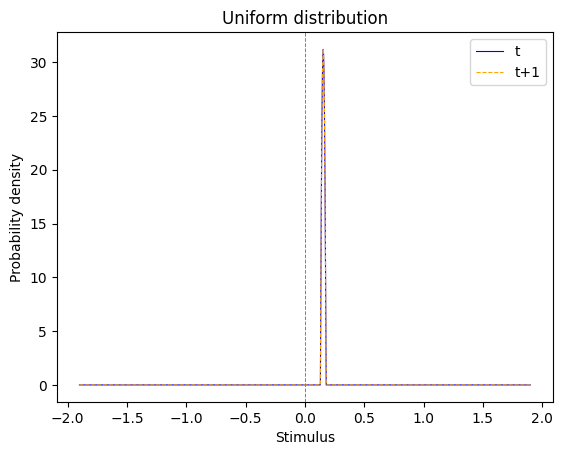

In [2]:
# --- simulation setup ---
eta_learning = 0.25
sigma_boundary = 3
sigma_noise = 0.15
A_repulsion = 0.0
seed = 1
n_samples = 1000
seed_sample = 210
s_uniform = Uniform(n_samples, seed_sample)
s_tilde_uniform = s_uniform + Noise_generator(len(s_uniform), seed, sigma_noise)
s_hat_uniform = Delta_repulsion(A_repulsion, s_tilde_uniform)
categories_uniform = np.where(s_uniform > 0, 1, 0)

# x for model
max_r = 1 + 6*sigma_noise + 2*A_repulsion*(1+6*sigma_noise)
min_r = -1 - 6*sigma_noise - 2*A_repulsion*(1+6*sigma_noise)
num_points = round((max_r - min_r) * 1000)
x_model = np.linspace(min_r, max_r, num_points)
y_model = uniform.pdf(x_model, loc=min_r, scale=(max_r-min_r))

# no_response and Not_Blockstart
no_response = np.full(n_samples, False)
Not_Blockstart = np.full(n_samples, True)
Not_Blockstart[0] = False


# for t =1000
t=1000
Delta_learning_matrix = Delta_learning(x_model, s_hat_uniform[:t], categories_uniform[:t], sigma_boundary)
_,_,_, y1000_uniform = update_distribution(x_model, y_model, s_hat_uniform[:t], categories_uniform[:t],
                                Delta_learning_matrix, eta_learning, no_response[:t], seed)


s_hard = np.array([-0.05])
# s_tilde_hard = s_hard + Noise_generator(len(s_hard), seed, sigma_noise)
# s_hat_hard = Delta_repulsion(A_repulsion, s_tilde_hard)
categories_hard = np.where(s_hard > 0, 1, 0)
no_response_hard = np.full(1, False)
Not_Blockstart_hard = np.full(1, True)

Delta_learning_matrix = Delta_learning(x_model, s_hard, categories_hard, sigma_boundary)
_,_,reward_hard, y_hard = update_distribution(x_model, y1000_uniform, s_hard, categories_hard,
                                Delta_learning_matrix, eta_learning, no_response_hard, seed)

plt.plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, y_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()


In [3]:
reward_hard

[1]

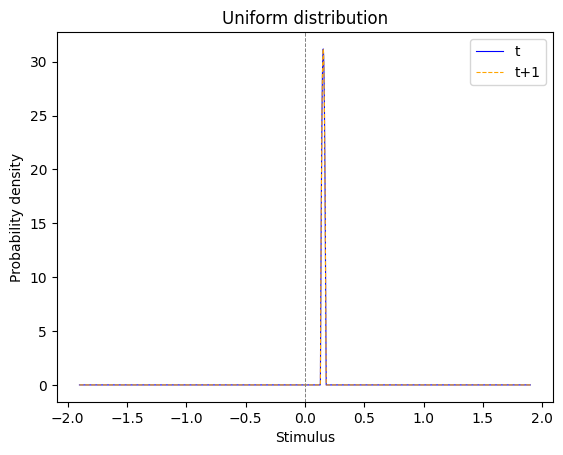

In [4]:
s_easy = np.array([-0.95])
# s_tilde_easy = s_easy + Noise_generator(len(s_easy), seed, sigma_noise)
# s_hat_easy = Delta_repulsion(A_repulsion, s_tilde_easy)
categories_easy = np.where(s_easy > 0, 1, 0)
no_response_easy = np.full(1, False)
Not_Blockstart_easy = np.full(1, True)

Delta_learning_matrix = Delta_learning(x_model, s_easy, categories_easy, sigma_boundary)
_,_,reward_easy, y_easy = update_distribution(x_model, y1000_uniform, s_easy, categories_easy,
                                Delta_learning_matrix, eta_learning, no_response_easy, seed)

plt.plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, y_easy, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()

In [5]:
reward_easy

[1]

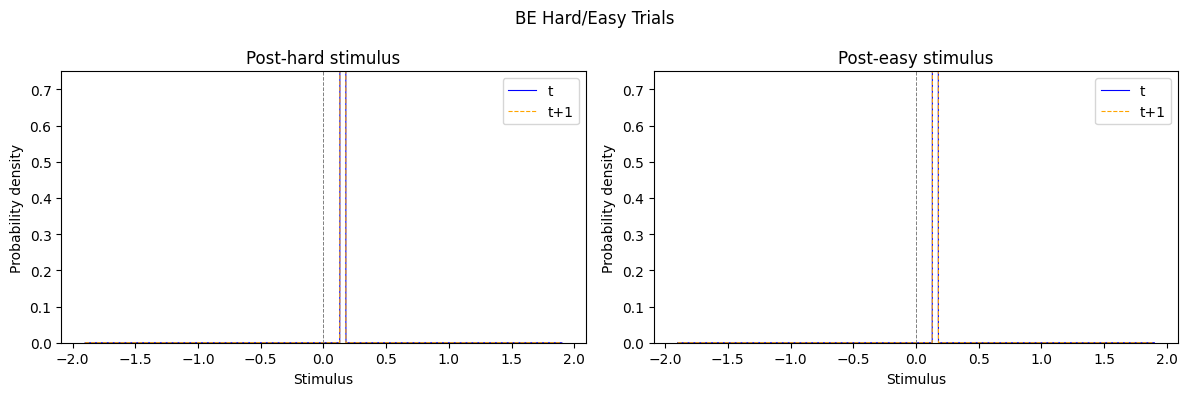

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for hard stimulus (from cell F6VG6sP7bmlr)
axes[0].plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
axes[0].plot(x_model, y_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
axes[0].set_xlabel('Stimulus')
axes[0].set_ylabel('Probability density')
axes[0].legend()
axes[0].set_title('Post-hard stimulus')
axes[0].set_ylim(0, 0.75)

# Plot for easy stimulus (from cell HvvtiJaxge9E)
axes[1].plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
axes[1].plot(x_model, y_easy, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
axes[1].set_xlabel('Stimulus')
axes[1].set_ylabel('Probability density')
axes[1].legend()
axes[1].set_title('Post-easy stimulus')
axes[1].set_ylim(0, 0.75)
plt.suptitle('BE Hard/Easy Trials')
plt.tight_layout()
plt.savefig("BE_post_hard_easy_trials.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()

**Earlier**

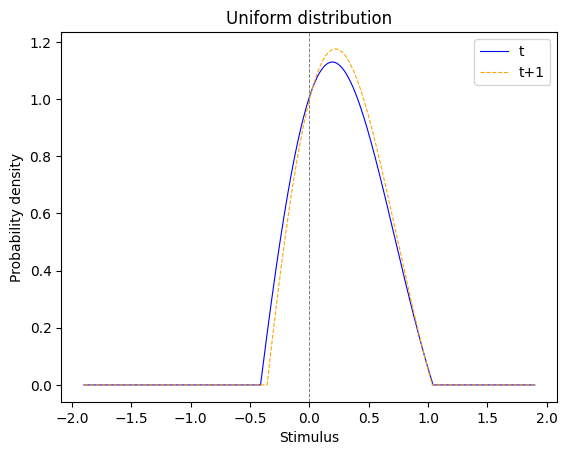

In [13]:
# for t =10
t=10
Delta_learning_matrix = Delta_learning(x_model, s_hat_uniform[:t], categories_uniform[:t], sigma_boundary)
_,_,_, y1000_uniform = update_distribution(x_model, y_model, s_hat_uniform[:t], categories_uniform[:t],
                                Delta_learning_matrix, eta_learning, no_response[:t], seed)


s_hard = np.array([-0.05])
# s_tilde_hard = s_hard + Noise_generator(len(s_hard), seed, sigma_noise)
# s_hat_hard = Delta_repulsion(A_repulsion, s_tilde_hard)
categories_hard = np.where(s_hard > 0, 1, 0)
no_response_hard = np.full(1, False)
Not_Blockstart_hard = np.full(1, True)

Delta_learning_matrix = Delta_learning(x_model, s_hard, categories_hard, sigma_boundary)
_,_,reward_hard, y_hard = update_distribution(x_model, y1000_uniform, s_hard, categories_hard,
                                Delta_learning_matrix, eta_learning, no_response_hard, seed)

plt.plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, y_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()


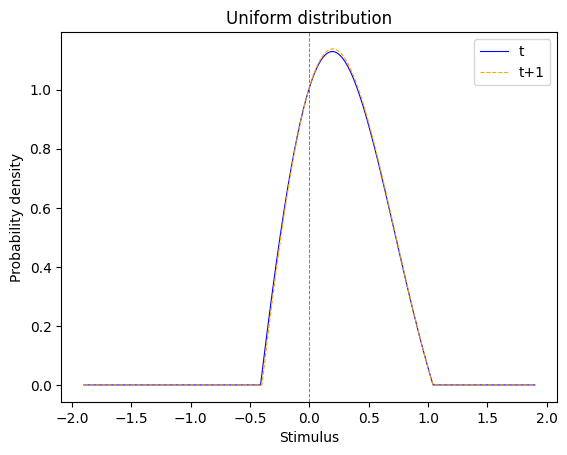

In [14]:
s_easy = np.array([-0.95])
# s_tilde_easy = s_easy + Noise_generator(len(s_easy), seed, sigma_noise)
# s_hat_easy = Delta_repulsion(A_repulsion, s_tilde_easy)
categories_easy = np.where(s_easy > 0, 1, 0)
no_response_easy = np.full(1, False)
Not_Blockstart_easy = np.full(1, True)

Delta_learning_matrix = Delta_learning(x_model, s_easy, categories_easy, sigma_boundary)
_,_,reward_easy, y_easy = update_distribution(x_model, y1000_uniform, s_easy, categories_easy,
                                Delta_learning_matrix, eta_learning, no_response_easy, seed)

plt.plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, y_easy, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()

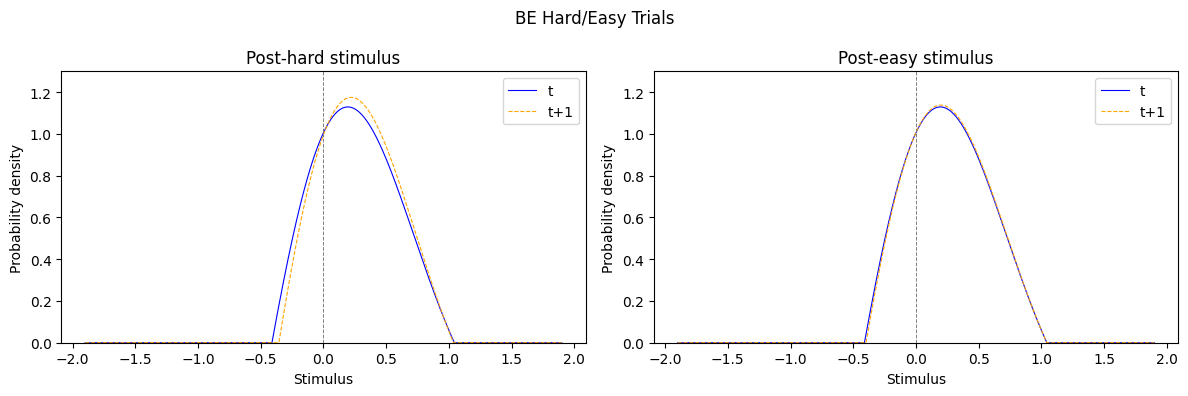

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for hard stimulus (from cell F6VG6sP7bmlr)
axes[0].plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
axes[0].plot(x_model, y_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
axes[0].set_xlabel('Stimulus')
axes[0].set_ylabel('Probability density')
axes[0].legend()
axes[0].set_title('Post-hard stimulus')
axes[0].set_ylim(0, 1.3)

# Plot for easy stimulus (from cell HvvtiJaxge9E)
axes[1].plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
axes[1].plot(x_model, y_easy, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
axes[1].set_xlabel('Stimulus')
axes[1].set_ylabel('Probability density')
axes[1].legend()
axes[1].set_title('Post-easy stimulus')
axes[1].set_ylim(0, 1.3)
plt.suptitle('BE Hard/Easy Trials')
plt.tight_layout()
plt.savefig("BE_post_hard_easy_trials.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()

**Evolution**

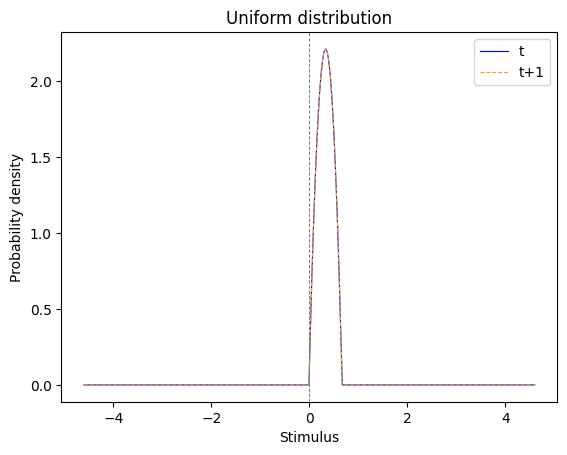

In [64]:
# --- simulation setup ---
eta_learning = 0.01
sigma_boundary = 3
sigma_noise = 0.6
A_repulsion = 0.0
seed = 1
n_samples = 1000
seed_sample = 10
s_uniform = Asym_right(n_samples, seed_sample)
s_tilde_uniform = s_uniform + Noise_generator(len(s_uniform), seed, sigma_noise)
s_hat_uniform = Delta_repulsion(A_repulsion, s_tilde_uniform)
categories_uniform = np.where(s_uniform > 0, 1, 0)

# x for model
max_r = 1 + 6*sigma_noise + 2*A_repulsion*(1+6*sigma_noise)
min_r = -1 - 6*sigma_noise - 2*A_repulsion*(1+6*sigma_noise)
num_points = round((max_r - min_r) * 1000)
x_model = np.linspace(min_r, max_r, num_points)
y_model = uniform.pdf(x_model, loc=min_r, scale=(max_r-min_r))

# no_response and Not_Blockstart
no_response = np.full(n_samples, False)
Not_Blockstart = np.full(n_samples, True)
Not_Blockstart[0] = False


# for t =1000
t=999
Delta_learning_matrix = Delta_learning(x_model, s_hat_uniform[:t], categories_uniform[:t], sigma_boundary)
_,_,_, y1000_uniform = update_distribution(x_model, y_model, s_hat_uniform[:t], categories_uniform[:t],
                                Delta_learning_matrix, eta_learning, no_response[:t], seed)


s_hard = np.array([s_hat_uniform[t]])
# s_tilde_hard = s_hard + Noise_generator(len(s_hard), seed, sigma_noise)
# s_hat_hard = Delta_repulsion(A_repulsion, s_tilde_hard)
categories_hard = np.where(s_hard > 0, 1, 0)
no_response_hard = np.full(1, False)
Not_Blockstart_hard = np.full(1, True)

Delta_learning_matrix = Delta_learning(x_model, s_hard, categories_hard, sigma_boundary)
_,_,reward_hard, y_hard = update_distribution(x_model, y1000_uniform, s_hard, categories_hard,
                                Delta_learning_matrix, eta_learning, no_response_hard, seed)

plt.plot(x_model, y1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, y_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()
